In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full_path = '/projects/westgroup/nora/Code/'
gas_RMG = ct.Solution(full_path+'projects/rebasing_PFAS/models/PFAS/insights_from_Weber/PFOA+Air/fix_reg_spec_in_core/lower_tolerance/forbidden_group_birad_recomb/chemkin/copies/copy_chem0271.cti')
gas_Weber = ct.Solution(full_path+'projects/rebasing_PFAS/models/PFAS/insights_from_Weber/chemkin_for_Weber_2025_12_12/PFAS_O2_H2O_N2O_publish.cti')

For species HOCO, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  -17.236856747666668
	Value computed using high-temperature polynomial: -16.91235667243



<Species CF2(15)> <Species CF2>
<Species H(12)> <Species H>
0.004968010646602079 0.004968010646602079
0.0049680106466292815 0.004968010646624037
<Species CF(17)> <Species CF>
<Species HF(4)> <Species HF>


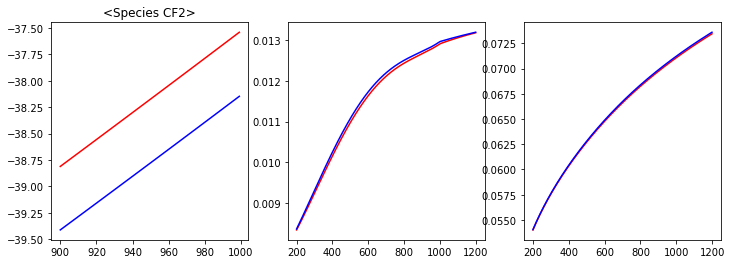

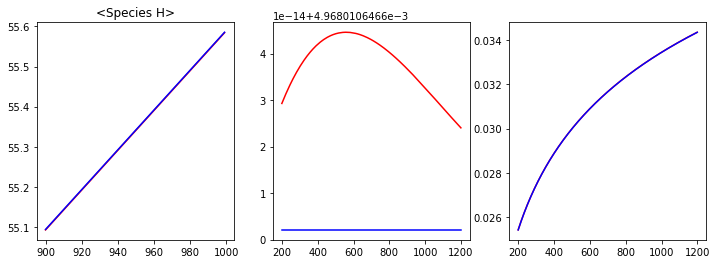

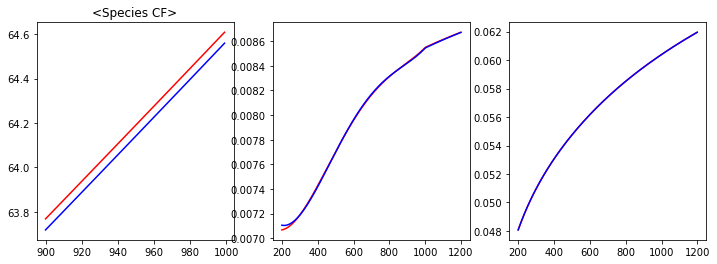

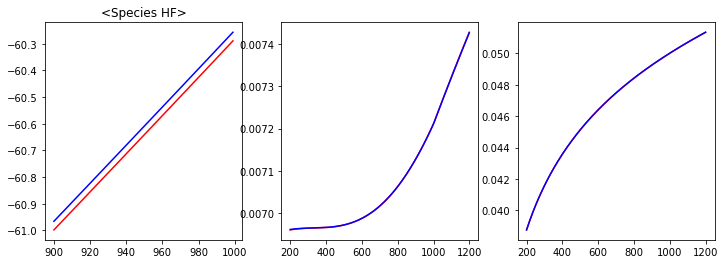

In [12]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))


#species order = CF2, H, CF, HF

for spec_index_RMG, spec_index_Web in zip([16, 13, 18, 5], [5, 39, 41, 3]):
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    print(gas_RMG.species()[spec_index_RMG], gas_Weber.species()[spec_index_Web])
    H_RMG = [gas_RMG.species()[spec_index_RMG].thermo.h(temp)/4184/1000 for temp in range(200,1200)]
    Cp_RMG = [gas_RMG.species()[spec_index_RMG].thermo.cp(temp)/4184/1000 for temp in range(200,1200)]
    S_RMG = [gas_RMG.species()[spec_index_RMG].thermo.s(temp)/4184/1000 for temp in range(200,1200)]


    H_Web = [gas_Weber.species()[spec_index_Web].thermo.h(temp)/4184/1000 for temp in range(200,1200)]
    Cp_Web = [gas_Weber.species()[spec_index_Web].thermo.cp(temp)/4184/1000 for temp in range(200,1200)]
    S_Web = [gas_Weber.species()[spec_index_Web].thermo.s(temp)/4184/1000 for temp in range(200,1200)]

    
    # axes[0].plot(range(200,1200), H_RMG, c='red')
    # axes[0].plot(range(200,1200), H_Web, c='blue')
    H_Web_900_1000 = []
    for val, temp in zip(H_Web, range(200,1200)):
        if temp in range(900,1000):
             H_Web_900_1000.append(val)

    H_RMG_900_1000 = []
    for val, temp in zip(H_RMG, range(200,1200)):
        if temp in range(900,1000):
             H_RMG_900_1000.append(val)                
                
                
    axes[0].plot(range(900,1000), H_Web_900_1000, c='red')
    axes[0].plot(range(900,1000), H_RMG_900_1000, c='blue')
    
    axes[1].plot(range(200,1200), Cp_RMG, c='red')
    axes[1].plot(range(200,1200), Cp_Web, c='blue')
    
    if gas_Weber.species()[spec_index_Web].name=='H':
        print(Cp_Web[0], Cp_Web[-1])
        print(Cp_RMG[0], Cp_RMG[-1]) 
        
    #     axes[1].set_yticks(np.arange(20000, 55000e-7, 2500e-7))
    
    axes[2].plot(range(200,1200), S_RMG, c='red')
    axes[2].plot(range(200,1200), S_Web, c='blue')
    
    axes[0].set_title(gas_Weber.species()[spec_index_Web])

In [40]:
#46 CF2 + H <=> CF + HF
#4 CF2(15) + H(12) <=> CF(17) + HF(4)

for rxn_index_RMG, rxn_index_Web in zip([4], [46]):
    


0 CHF(11) + H(12) <=> CH2F(13)
1 CHF(11) + H(12) <=> CH(14) + HF(4)
2 CH(14) + HF(4) <=> CH2F(13)
3 CF2(15) + H(12) <=> CHF2(16)
4 CF2(15) + H(12) <=> CF(17) + HF(4)
5 CF(17) + HF(4) <=> CHF2(16)
6 CH3(18) + F(19) <=> CH2F(13) + H(12)
7 CH3(18) + F(19) <=> CH2(S)(20) + HF(4)
8 CH3(18) + F(19) <=> CHF(11) + H2(21)
9 CH2F(13) + H(12) <=> CH3F(22)
10 CH2F(13) + H(12) <=> CH2(S)(20) + HF(4)
11 CH2F(13) + H(12) <=> CHF(11) + H2(21)
12 CH2(S)(20) + HF(4) <=> CH3F(22)
13 CH2(S)(20) + HF(4) <=> CHF(11) + H2(21)
14 CHF(11) + H2(21) <=> CH3F(22)
15 CH2F(13) + F(19) <=> CHF2(16) + H(12)
16 CH2F(13) + F(19) <=> CHF(11) + HF(4)
17 CH2F(13) + F(19) <=> CF2(15) + H2(21)
18 CHF2(16) + H(12) <=> CHF(11) + HF(4)
19 CHF2(16) + H(12) <=> CF2(15) + H2(21)
20 CHF(11) + HF(4) <=> CH2F2(23)
21 CHF(11) + HF(4) <=> CF2(15) + H2(21)
22 CF2(15) + H2(21) <=> CH2F2(23)
23 CO(8) + F(19) <=> FCO(24)
24 CHF(11) + O(25) <=> CO(8) + HF(4)
25 CF(17) + OH(26) <=> CO(8) + HF(4)
26 CFOH(27) <=> CO(8) + HF(4)
27 CHFO(28) <=>

In [16]:
gas_RMG.reactions()[4]

<PlogReaction: CF2(15) + H(12) <=> CF(17) + HF(4)>

In [15]:
gas_RMG.TPX = 650, ct.one_atm, {"PFOA(1)": 4.02e-4, #402 ppm of PFOA,
                            "H2O(3)": 7.50e-4, #750 ppm of H2O(g) 
                            "O2(2)": 0.20975808, #Total of trace species: 4.02e-4 + 7.50e-4 = 1.152e-3, Remaining fraction for air: 1 - 1.152e-3 = 0.998848, 21% O2, 79% N2
                            "N2": 0.78908992,
                            }


print(gas_RMG.forward_rate_constants[4])
print(gas_RMG.net_production_rates[4])

40585584.36274947
-4.041781170500811e-20


In [13]:
gas_Weber.TPX = 650, ct.one_atm, {"PFOA": 4.02e-4, #402 ppm of PFOA,
                            "H2O": 7.50e-4, #750 ppm of H2O(g) 
                            "O2": 0.20975808, #Total of trace species: 4.02e-4 + 7.50e-4 = 1.152e-3, Remaining fraction for air: 1 - 1.152e-3 = 0.998848, 21% O2, 79% N2
                            "N2": 0.78908992,
                            }


print(gas_Weber.forward_rate_constants[46])
print(gas_Weber.net_production_rates[46])

39800000000.0
0.0


In [62]:
dir(gas_Weber.species()[spec_index_Web].thermo)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_check_n_coeffs',
 'coeffs',
 'cp',
 'derived_type',
 'h',
 'max_temp',
 'min_temp',
 'n_coeffs',
 'reference_pressure',
 's']